In [ ]:
Step1. Read Data
Step2. Check NUll Imputation
Step3. Encoding
Step4. Standard Scalar(Optional)
Step5. Test Strain,Split up
Step6. Training the model
Step7. Prediction
Step.8 Evaluation

Microsoft : Classifying Cybersecurity Incidents with Machine Learning

Step1. Read the 1lakh data

In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'train.csv'

# Read the first 10,000 rows from the CSV file
data = pd.read_csv(file_path, nrows=1000000)

# Display the first few rows to verify
data.head()


,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


step2.check the null columns in ascending order

In [2]:
nullvalues = data.isna().sum()
nullvalues.sort_values(ascending=False)

ResourceType          99909
ActionGranular        99412
ActionGrouped         99412
ThreatFamily          99200
EmailClusterId        98984
AntispamDirection     98220
Roles                 97728
SuspicionLevel        84876
LastVerdict           76567
MitreTechniques       57496
IncidentGrade           525
ApplicationId             0
FileName                  0
RegistryValueData         0
RegistryValueName         0
OAuthApplicationId        0
ApplicationName           0
Unnamed: 0                0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
RegistryKey               0
DeviceName                0
NetworkMessageId          0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
EntityType          

In [ ]:
Step 3. Dropping the Null columns

In [3]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(data.columns)


Remaining columns after dropping:
Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')


Step4. Checking the columns dropped or not

In [4]:
data.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

Step5. Checking the Head Data

In [5]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('train_Limited.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary information
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0             Id  OrgId  IncidentId  AlertId  \
0           0   180388628218      0         612   123247   
1           1   455266534868     88         326   210035   
2           2  1056561957389    809       58352   712507   
3           3  1279900258736     92       32992   774301   
4           4   214748368522    148        4359   188041   

                  Timestamp  DetectorId  AlertTitle           Category  \
0  2024-06-04T06:05:15.000Z           7           6      InitialAccess   
1  2024-06-14T03:01:25.000Z          58          43       Exfiltration   
2  2024-06-13T04:52:55.000Z         423         298      InitialAccess   
3  2024-06-10T16:39:36.000Z           2           2  CommandAndControl   
4  2024-06-15T01:08:07.000Z           9          74          Execution   

    IncidentGrade  ... ApplicationName OAuthApplicationId  FileName  \
0    TruePositive  ...            3421                881    289573   
1   FalsePositive  ...            3421              

step6. Checking the feature engineering

In [6]:
# Assuming you have a 'timestamp' column in your dataset
if 'Timestamp' in data.columns:
    # Convert 'timestamp' to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    # Extract features from the timestamp
    data['hour'] = data['Timestamp'].dt.hour
    data['day_of_week'] = data['Timestamp'].dt.dayofweek
    data['month'] = data['Timestamp'].dt.month
    data['year'] = data['Timestamp'].dt.year

    # Drop the original 'timestamp' column if it's no longer needed
    data = data.drop(columns=['Timestamp'])

print("Feature Engineering Completed:\n", data.head())


Feature Engineering Completed:
    Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0           0   180388628218      0         612   123247           7   
1           1   455266534868     88         326   210035          58   
2           2  1056561957389    809       58352   712507         423   
3           3  1279900258736     92       32992   774301           2   
4           4   214748368522    148        4359   188041           9   

   AlertTitle           Category   IncidentGrade EntityType  ...  \
0           6      InitialAccess    TruePositive         Ip  ...   
1          43       Exfiltration   FalsePositive       User  ...   
2         298      InitialAccess   FalsePositive        Url  ...   
3           2  CommandAndControl  BenignPositive        Url  ...   
4          74          Execution    TruePositive       User  ...   

  ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  hour  \
0           3586         5         66           31  

In [7]:
data.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'hour', 'day_of_week', 'month', 'year'],
      dtype='object')

Step7.Exploaratory Data Analysis

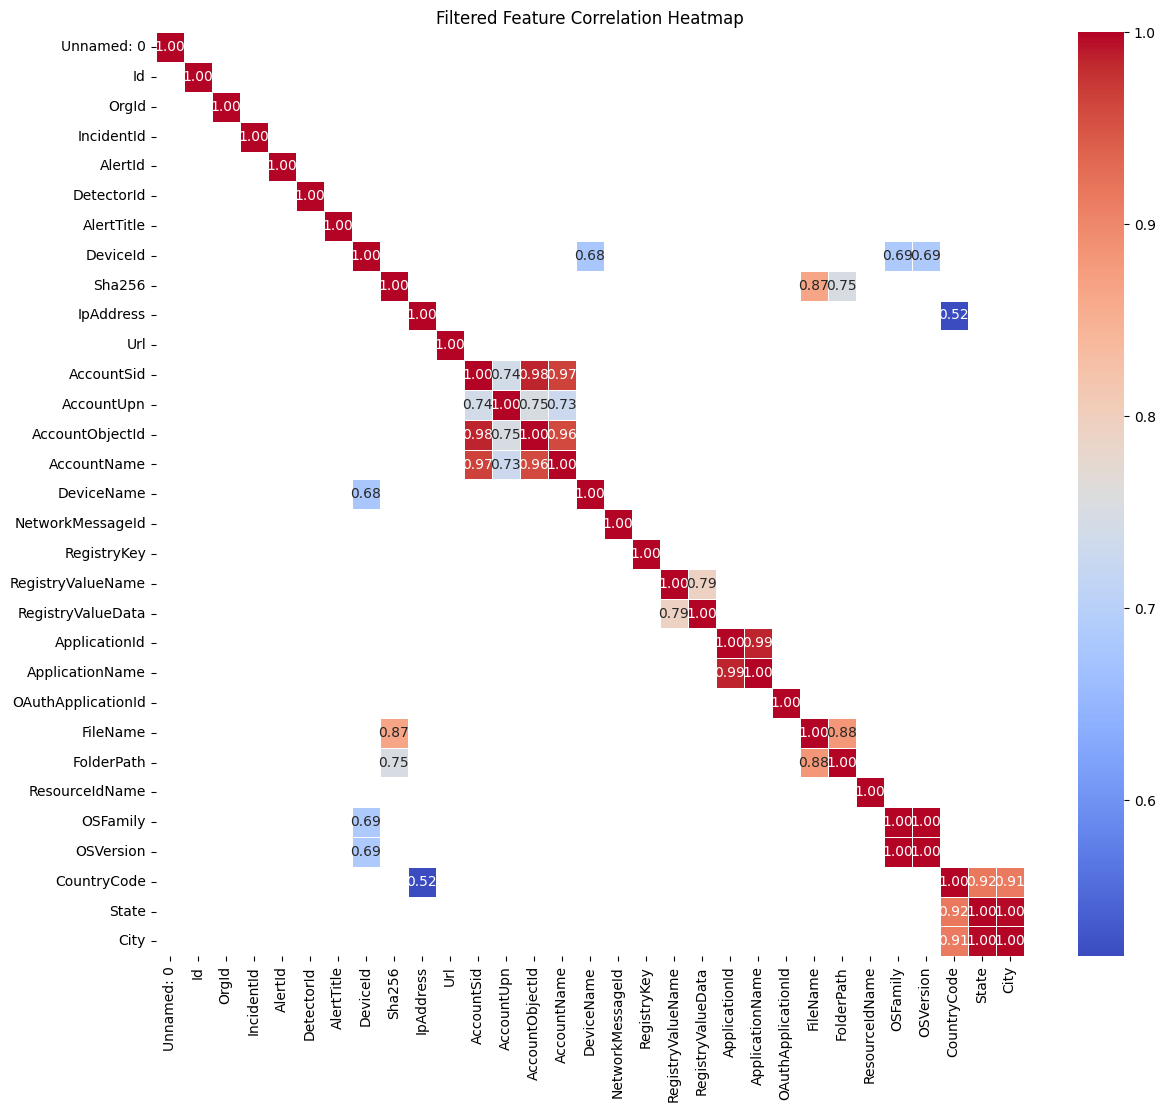

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your pandas DataFrame
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Remove columns with low variance
numeric_data = numeric_data.loc[:, numeric_data.var() > 0.1]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Optionally, filter to show only high correlations (absolute value > 0.5)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) > 0.5]

# Increase the size of the heatmap for better readability
plt.figure(figsize=(14, 12))

# Plot the heatmap with annotations
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set title and display the plot
plt.title('Filtered Feature Correlation Heatmap')
plt.show()


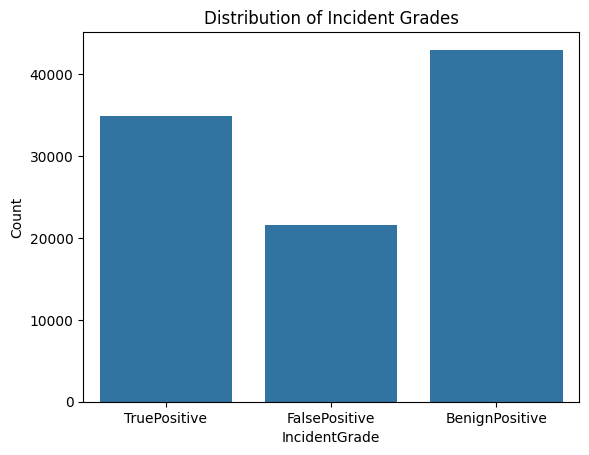

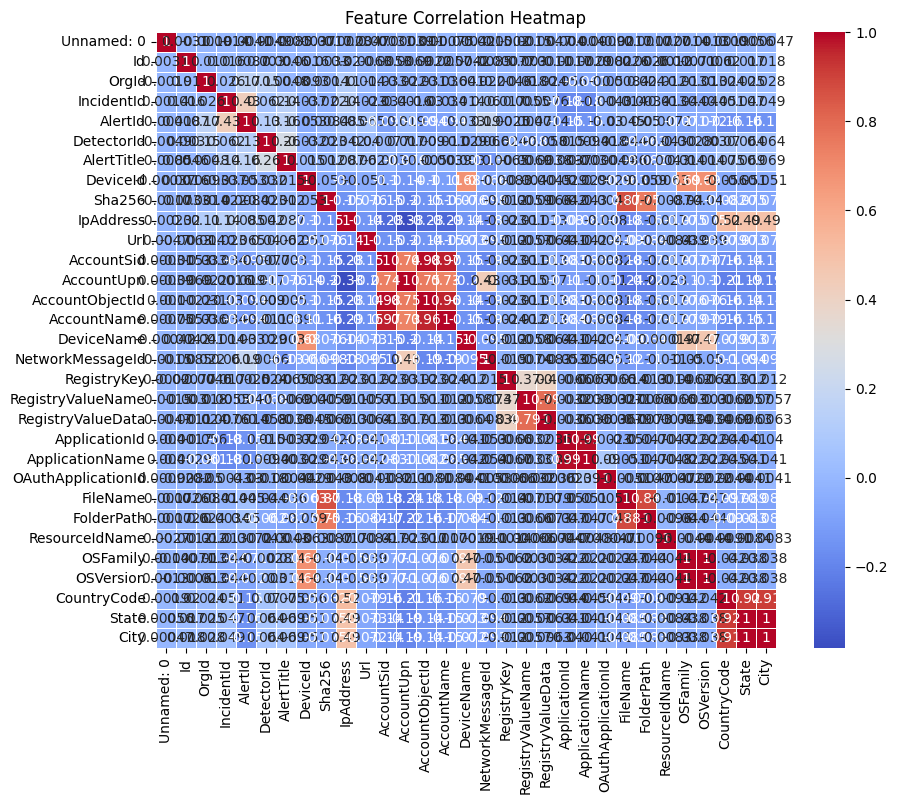

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a pandas DataFrame
# Plot the distribution of the target variable (Assuming the target is 'IncidentGrade')
sns.countplot(x='IncidentGrade', data=data)
plt.title('Distribution of Incident Grades')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Step8. Encoding the numerical and categorical variables

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Handle missing values
# For numerical columns, use mean imputation
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.fillna(data_numeric.mean(), inplace=True)

# For categorical columns, use mode imputation (most frequent value)
data_categorical = data.select_dtypes(include=['object'])
data_categorical.fillna(data_categorical.mode().iloc[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_categorical.columns:
    le = LabelEncoder()
    data_categorical[column] = le.fit_transform(data_categorical[column])
    label_encoders[column] = le

# Combine back the numeric and categorical data
data = pd.concat([data_numeric, data_categorical], axis=1)

# Separate features and target variable
X = data.drop('IncidentGrade', axis=1)
y = data['IncidentGrade']

# Standardize numerical features
scaler = StandardScaler()

# Standardize only the numerical columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Recreate the final DataFrame by combining the scaled numerical features with the categorical ones
X_scaled = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns, index=X.index)
X_scaled = pd.concat([X_scaled, X.select_dtypes(include=['object', 'bool'])], axis=1)

# Split the dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)




Step 8. Make Prdictions and evaluate the model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train a logistic regression model
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.59905
Precision: 0.5953569649489042
Recall: 0.59905
F1 Score: 0.5710720585556889

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67      8710
           1       0.56      0.19      0.28      4313
           2       0.63      0.63      0.63      6977

    accuracy                           0.60     20000
   macro avg       0.59      0.53      0.53     20000
weighted avg       0.60      0.60      0.57     20000

Confusion Matrix:
[[6781  436 1493]
 [2453  801 1059]
 [2379  199 4399]]
